In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
le = LabelEncoder()

In [ ]:
df['Genre_encoded'] = le.fit_transform(df['Genre']) # Assuming the column is named 'Genre'
df['Director_encoded'] = le.fit_transform(df['Director'])
df['Actor 1_encoded'] = le.fit_transform(df['Actor 1'])
df['Actor 2_encoded'] = le.fit_transform(df['Actor 2'])
df['Actor 3_encoded'] = le.fit_transform(df['Actor 3'])

In [ ]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [ ]:
X = df[['Genre_encoded', 'Director_encoded', 'Actor 1_encoded','Actor 2_encoded','Actor 3_encoded']]
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(y_pred,'y_pred')

[5.8612052  6.28998371 5.80070792 ... 6.36932428 5.76339992 6.34389178] y_pred


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9213552398613657
R-squared: 0.0427252990269148


In [ ]:
new_movie = pd.DataFrame({'Genre_encoded': [1], 'Director_encoded': [2], 'Actor 1_encoded': [5],'Actor 2_encoded': [5],'Actor 3_encoded': [5]})
predicted_rating = model.predict(new_movie)
print(f'Predicted Rating for the new movie: {predicted_rating[0]}')

Predicted Rating for the new movie: 6.032491855032202


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

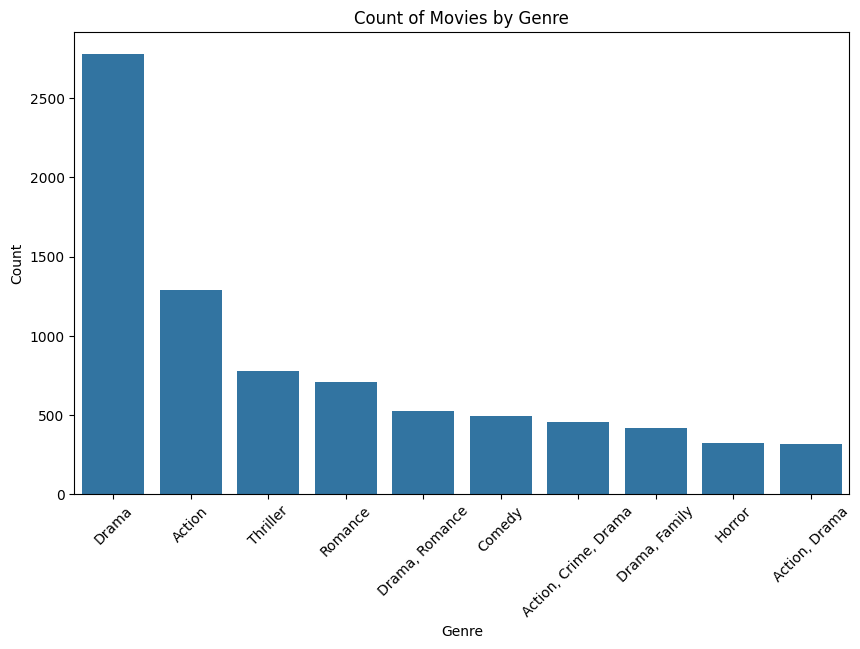

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index[:10])
plt.title('Count of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()